In [19]:
import pandas as pd

data_in = pd.read_csv("kaggle_data/train.csv")#读取数据
data_in['Name'] = 0 #无关列归0
data_in['Sex'] = data_in['Sex'].replace({'male': 0, 'female': 1})#性别映射
#字符串映射为浮点数
string_count1 = data_in['Ticket'].value_counts()
string_count2 = data_in['Cabin'].value_counts()
string_count3 = data_in['Embarked'].value_counts()
mapping = {}
for idx, string_value in enumerate(string_count1.index):
    mapping[string_value] = float(idx)
for idx, string_value in enumerate(string_count2.index):
    mapping[string_value] = float(idx)
for idx, string_value in enumerate(string_count3.index):
    mapping[string_value] = float(idx)
# 将 'column_name' 列中的字符串映射为浮点数
data_in['Ticket'] = data_in['Ticket'].map(mapping)
data_in['Cabin'] = data_in['Cabin'].map(mapping)
data_in['Embarked'] = data_in['Embarked'].map(mapping)
data_in = data_in.fillna(-1)
print(data_in)
print(data_in.head(20))
# 将 DataFrame 保存为新的 CSV 文件
data_in.to_csv('kaggle_data/to_train.csv', index=False)

     PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
0              1         0       3     0    0  22.0      1      0   162.0   
1              2         1       1     0    1  38.0      1      0   545.0   
2              3         1       3     0    1  26.0      0      0   489.0   
3              4         1       1     0    1  35.0      1      0    70.0   
4              5         0       3     0    0  35.0      0      0   490.0   
..           ...       ...     ...   ...  ...   ...    ...    ...     ...   
886          887         0       2     0    0  27.0      0      0   296.0   
887          888         1       1     0    1  19.0      0      0   297.0   
888          889         0       3     0    1  -1.0      1      2    56.0   
889          890         1       1     0    0  26.0      0      0   298.0   
890          891         0       3     0    0  32.0      0      0   680.0   

        Fare  Cabin  Embarked  
0     7.2500   -1.0       0.0  
1    71.283

In [35]:
import torch
from torch.utils.data import DataLoader, TensorDataset

data = pd.read_csv('kaggle_data/to_train.csv')
t_data = pd.read_csv('kaggle_data/to_test.csv')
# print(data)

# 提取特征数据（除了 'Survived' 列以外的所有列）
features = data.drop(['Survived','Name'], axis=1).values
t_features = t_data.drop(['Name'], axis=1).values
t_idx = t_data['PassengerId'].values
# 提取标签数据（'Survived' 列）
labels = data['Survived'].values
t_labels = (pd.read_csv('kaggle_data/label.csv')).drop('PassengerId', axis=1).values
                       
# 将特征数据和标签数据转换为 Tensor
tensor_features = torch.tensor(features,dtype=torch.float32)
tensor_labels = torch.tensor(labels,dtype=torch.float32).view(-1,1)
t_tensor_features = torch.tensor(t_features,dtype=torch.float32)
t_tensor_labels = torch.tensor(t_labels,dtype=torch.float32).view(-1,1)

print(tensor_features)
print(tensor_labels.shape)
print(t_tensor_features)
print(t_tensor_labels.shape)

# 将特征数据和标签数据转换为 TensorDataset
dataset = TensorDataset(tensor_features, tensor_labels)
t_dataset = TensorDataset(t_tensor_features, t_tensor_labels)
# 定义批次大小
batch_size = 100

# 创建 DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
t_dataloader = DataLoader(t_dataset, batch_size=batch_size, shuffle=False)

tensor([[  1.0000,   3.0000,   0.0000,  ...,   7.2500,  -1.0000,   0.0000],
        [  2.0000,   1.0000,   1.0000,  ...,  71.2833,  62.0000,   1.0000],
        [  3.0000,   3.0000,   1.0000,  ...,   7.9250,  -1.0000,   0.0000],
        ...,
        [889.0000,   3.0000,   1.0000,  ...,  23.4500,  -1.0000,   0.0000],
        [890.0000,   1.0000,   0.0000,  ...,  30.0000, 146.0000,   1.0000],
        [891.0000,   3.0000,   0.0000,  ...,   7.7500,  -1.0000,   2.0000]])
torch.Size([891, 1])
tensor([[ 8.9200e+02,  3.0000e+00,  0.0000e+00,  ...,  7.8292e+00,
         -1.0000e+00,  2.0000e+00],
        [ 8.9300e+02,  3.0000e+00,  1.0000e+00,  ...,  7.0000e+00,
         -1.0000e+00,  0.0000e+00],
        [ 8.9400e+02,  2.0000e+00,  0.0000e+00,  ...,  9.6875e+00,
         -1.0000e+00,  2.0000e+00],
        ...,
        [ 1.3070e+03,  3.0000e+00,  0.0000e+00,  ...,  7.2500e+00,
         -1.0000e+00,  0.0000e+00],
        [ 1.3080e+03,  3.0000e+00,  0.0000e+00,  ...,  8.0500e+00,
         -1.0000e

epoch: 1 i: 1 loss: tensor(0.6784, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
epoch: 6 i: 1 loss: tensor(0.5994, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
epoch: 11 i: 1 loss: tensor(0.6626, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
epoch: 16 i: 1 loss: tensor(0.5900, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
epoch: 21 i: 1 loss: tensor(0.5267, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
epoch: 26 i: 1 loss: tensor(0.6074, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
epoch: 31 i: 1 loss: tensor(0.5885, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
epoch: 36 i: 1 loss: tensor(0.5308, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
epoch: 41 i: 1 loss: tensor(0.5476, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
epoch: 46 i: 1 loss: tensor(0.5270, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
epoch: 51 i: 1 loss: tensor(0.4966, device='cuda:0', grad_fn=<BinaryCrossEntropyBa

epoch: 446 i: 1 loss: tensor(0.2762, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
epoch: 451 i: 1 loss: tensor(0.2475, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
epoch: 456 i: 1 loss: tensor(0.3463, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
epoch: 461 i: 1 loss: tensor(0.2906, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
epoch: 466 i: 1 loss: tensor(0.2318, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
epoch: 471 i: 1 loss: tensor(0.2301, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
epoch: 476 i: 1 loss: tensor(0.3756, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
epoch: 481 i: 1 loss: tensor(0.2876, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
epoch: 486 i: 1 loss: tensor(0.2634, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
epoch: 491 i: 1 loss: tensor(0.2820, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
epoch: 496 i: 1 loss: tensor(0.3492, device='cuda:0', grad_fn=<BinaryC

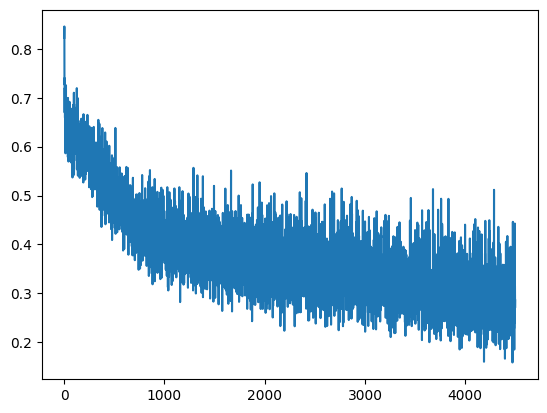

In [46]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

class mlp(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Sequential(nn.Linear(10,64),nn.BatchNorm1d(64),nn.Sigmoid())
        self.fc2 = nn.Sequential(nn.Linear(64,64),nn.BatchNorm1d(64),nn.ReLU())
        self.fc3 = nn.Sequential(nn.Linear(64,10),nn.BatchNorm1d(10),nn.ReLU())
        self.fc4 = nn.Sequential(nn.Linear(10,64),nn.BatchNorm1d(64),nn.ReLU())
        self.fc5 = nn.Sequential(nn.Linear(64,1),nn.BatchNorm1d(1),nn.Sigmoid())
    def forward(self,x):
        out = self.fc1(x)
        out1 = self.fc2(out)
        out2 = self.fc3(out1+out)
        out3 = self.fc4(out2+x)
        out4 = self.fc5(out1+out3)
        return out4

model = mlp().to('cuda')
train_loss = []
test_loss = []
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
#optimizer = optim.ASGD(model.parameters(), lr=1e-3)

flag = 0
if flag:
    model.load_state_dict(torch.load('checkpoint/mlp.pth'))

for epoch in range(500):
    model.train()
    for i,(x,label) in enumerate(dataloader):
        x = x.to('cuda')
        label = label.to('cuda')
        out = model(x)
#         print(out)
#         print(label)
        loss = criterion(out,label)
        if i%10==1 and epoch%5==1:
            print("epoch:",epoch,"i:",i,"loss:",loss)
        train_loss.append(loss.cpu().item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
#     if epoch%5:
#         model.eval()
#         for i,(x,label) in enumerate(t_dataloader):
#             x = x.to('cuda')
#             label = label.to('cuda')
#             out = model(x)
#             loss = criterion(out,label)
#             out = (out>0.5).float().cpu().numpy()
#             label = label.cpu().numpy()
#             PN = (out==label).sum()/label.shape[0]
#             if i%10==1 and epoch%10==1:
#                 print("*=*"*10,"测试结果如下：","=*="*10)
#                 print("epoch:",epoch,"i:",i,"loss:",loss)
#                 print("正确率：",PN)
#             test_loss.append(loss.cpu().item())
            
plt.plot(train_loss)
torch.save(model.state_dict(),'checkpoint/mlp.pth')

In [47]:
predictions = []
model.eval()
for x,_ in t_dataset:
    x = x.view(1,-1)
    x = x.to('cuda')
    out = model(x)
    out = (out>0.5).float().cpu().item()
    predictions.append(int(out))

submission_df = pd.DataFrame({
    'PassengerId': t_idx,  # 假设 PassengerId 从 1 开始递增
    'Survived': predictions  # 假设预测结果保存在名为 'Survived' 的列中
})

# 将 DataFrame 写入 CSV 文件
submission_df.to_csv('kaggle_result/submission.csv', index=False)  # 将索引写入 CSV 文件中

In [5]:
t1 = pd.read_csv("kaggle_data/label.csv").values
t2 = pd.read_csv("kaggle_result/submission.csv").values
print(t1,t2)

[[ 892    0]
 [ 893    1]
 [ 894    0]
 [ 895    0]
 [ 896    1]
 [ 897    0]
 [ 898    1]
 [ 899    0]
 [ 900    1]
 [ 901    0]
 [ 902    0]
 [ 903    0]
 [ 904    1]
 [ 905    0]
 [ 906    1]
 [ 907    1]
 [ 908    0]
 [ 909    0]
 [ 910    1]
 [ 911    1]
 [ 912    0]
 [ 913    0]
 [ 914    1]
 [ 915    0]
 [ 916    1]
 [ 917    0]
 [ 918    1]
 [ 919    0]
 [ 920    0]
 [ 921    0]
 [ 922    0]
 [ 923    0]
 [ 924    1]
 [ 925    1]
 [ 926    0]
 [ 927    0]
 [ 928    1]
 [ 929    1]
 [ 930    0]
 [ 931    0]
 [ 932    0]
 [ 933    0]
 [ 934    0]
 [ 935    1]
 [ 936    1]
 [ 937    0]
 [ 938    0]
 [ 939    0]
 [ 940    1]
 [ 941    1]
 [ 942    0]
 [ 943    0]
 [ 944    1]
 [ 945    1]
 [ 946    0]
 [ 947    0]
 [ 948    0]
 [ 949    0]
 [ 950    0]
 [ 951    1]
 [ 952    0]
 [ 953    0]
 [ 954    0]
 [ 955    1]
 [ 956    0]
 [ 957    1]
 [ 958    1]
 [ 959    0]
 [ 960    0]
 [ 961    1]
 [ 962    1]
 [ 963    0]
 [ 964    1]
 [ 965    0]
 [ 966    1]
 [ 967    0]
 [ 968    0]